# Gas Price Time-Series Forecasting


VP on the commodity trading desk wants to start trading natural gas storage contracts. To enable the instrument to be priced accurately, we need to extrapolate the available data to estimate future gas prices.

Gas price data available: monthly gas prices (market price of natural gas delivered at the end of each calendar month) recorded from 31st October 2020 to 30th September 2024

Tasks:
- Produce a picture of the existing price data, observing seasonal trends
- Estimate the purchase price of gas at any date in the past
- Extrapolate for one year into the future, i.e., to September 2025

(Very simple model - ignore market holidays, weekends, and bank holidays)

<AxesSubplot:xlabel='Month', ylabel='Price (US$ per million BTU)'>

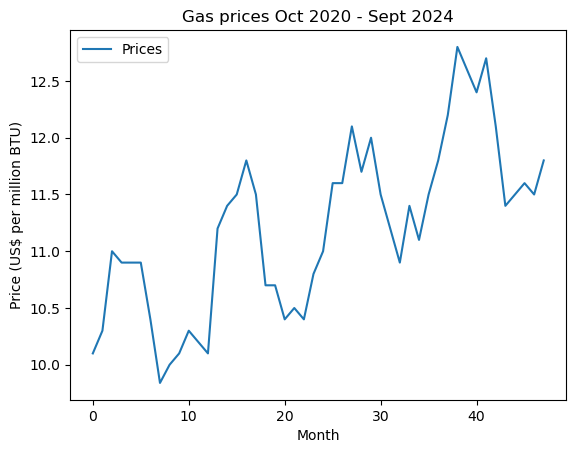

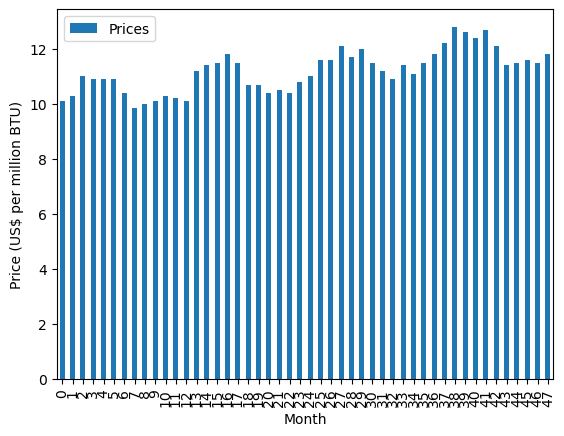

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Nat_Gas.csv')
df.plot(title="Gas prices Oct 2020 - Sept 2024", xlabel="Month", ylabel="Price (US$ per million BTU)")
df.plot(xlabel="Month", ylabel="Price (US$ per million BTU)", kind="bar")

(Month 0 is October 2020)

- Cyclic pattern, alternating every 12 months - a year must have its own pattern
- Expectation: higher prices in Winter months, lower prices in Summer months
- Overall, prices increasing linearly every year

Let's take a look at the first 12 months, October 2020 to September 2021:

<AxesSubplot:title={'center':'Gas prices Oct 2020 - Sept 2021'}, xlabel='Month', ylabel='Price (US$ per million BTU)'>

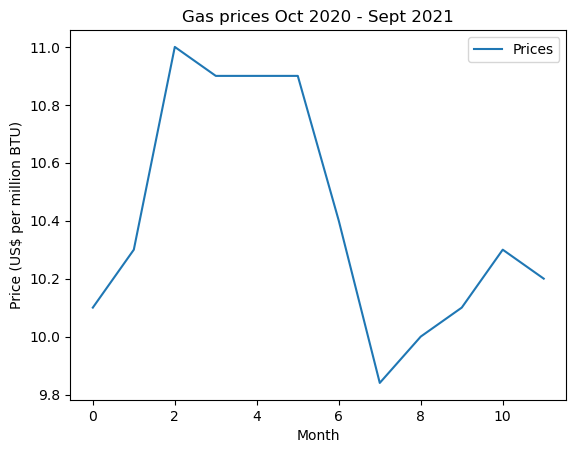

In [14]:
df_2020 = df.iloc[:12]
df_2020.plot(title="Gas prices Oct 2020 - Sept 2021", xlabel="Month", ylabel="Price (US$ per million BTU)")

Months 2-4, corresponding to December to January, have the highest prices. Expected, with these being the winter months. Likewise, months 6-8 (May - July) have the lowest prices. Again, expected, with these likely being the hottest months of the year.

But to build a model and forecast, we should look at the yearly change for a single month, since we observed earlier that the prices are increasing at a linear rate every year.

Example months:

<AxesSubplot:title={'center':'December gas prices 2020 - 2023'}, xlabel='Month', ylabel='Price (US$ per million BTU)'>

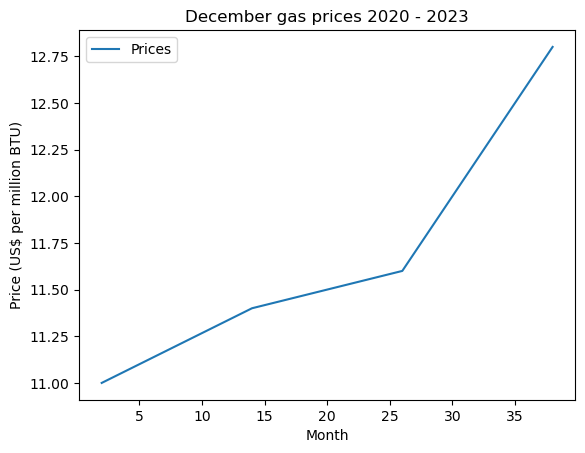

In [16]:
df_dec = df[df.index % 12 == 2]
df_dec.plot(title="December gas prices 2020 - 2023", xlabel="Month", ylabel="Price (US$ per million BTU)")